## Hassan Imran
## 22i-0813
## Section E

### LAB#15


In [68]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Create the Neural Network Model using nn.module

In [69]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

torch.manual_seed(41)
model = Model()


# Data Preprocessing
Split the dataset, extract the features and normalize if needed, and convert the labels into tensors using LongTensor()

In [70]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [71]:
class_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
df['species'] = df['species'].map(class_map)

X = df.drop('species', axis=1).values
y = df['species'].values

X = (X - X.mean(axis=0)) / X.std(axis=0)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


Set the Loss Function and optimizer

In [73]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


# Train the model

In [75]:
epochs = 100
losses = []

for i in range(epochs):
    # forward passs
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())

    # zero grad
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 10 == 0:
        print(f'epoch {i} , loss =  {loss.item():.4f}')


epoch 0 , loss =  0.0510
epoch 10 , loss =  0.0496
epoch 20 , loss =  0.0487
epoch 30 , loss =  0.0482
epoch 40 , loss =  0.0478
epoch 50 , loss =  0.0475
epoch 60 , loss =  0.0473
epoch 70 , loss =  0.0472
epoch 80 , loss =  0.0471
epoch 90 , loss =  0.0470


# Graph the losses per epoch

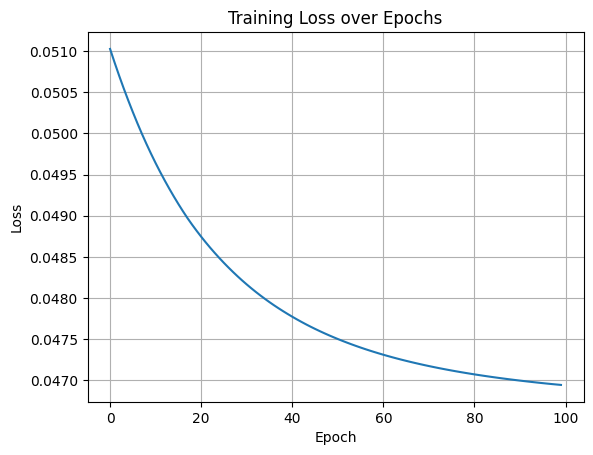

In [76]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.show()

# Test the model on the test set

In [77]:
with torch.no_grad():
    y_eval = model(X_test)
    predicted = torch.argmax(y_eval, dim=1)
    correct = (predicted == y_test).sum().item()
    accuracy = correct / len(y_test)

print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 100.00%
